In [280]:
import numpy as np
import pandas as pd
from tqdm import tqdm


In [2]:
txt='''[[[0,[4,5]],[0,0]],[[[4,5],[2,6]],[9,5]]]
[7,[[[3,7],[4,3]],[[6,3],[8,8]]]]
[[2,[[0,8],[3,4]]],[[[6,7],1],[7,[1,6]]]]
[[[[2,4],7],[6,[0,5]]],[[[6,8],[2,8]],[[2,1],[4,5]]]]
[7,[5,[[3,8],[1,4]]]]
[[2,[2,2]],[8,[8,1]]]
[2,9]
[1,[[[9,3],9],[[9,0],[0,7]]]]
[[[5,[7,4]],7],1]
[[[[4,2],2],6],[8,7]]'''

In [25]:
tree_lists=[eval(x) for x in txt.split('\n')]
tree_strs=[x for x in txt.split('\n')]


In [ ]:
tree_lists

In [8]:
tree_lists[0][1]

[[[4, 5], [2, 6]], [9, 5]]

In [284]:
class Node:
    def __init__(self,tree_list,deep=0):
        if tree_list is not None:
            self.deep=deep
            self.value=None
            if type(tree_list)==list:
                self.left=Node(tree_list[0],deep=deep+1)
                self.right=Node(tree_list[1],deep=deep+1)
            else:
                self.value=tree_list
                self.left=None
                self.right=None
        else:
            self.value=None
            self.left=None
            self.right=None
            
    def set_parent(self,node):
        self.parent=node
        
        
    @staticmethod    
    def add(node_left,node_right):
        root=Node(None)
        root.left=node_left
        root.right=node_right
        return root
    def __add__(self,b):
        root=Node(None)
        root.left=self
        root.right=b
        return root
    
    def __repr__(self):
        if self.value is None:
            txt=f'[{self.left},{self.right}]'
        else:
            txt=f'{self.value}'
        return txt
   

def find_greater_10(tree):
    output=None
    if tree.left:
        output=greater_10(tree.left)
        if output is None:
            output=greater_10(tree.right)
    else:
        if tree.value>=10:
            print('found')
            output= tree
        else:
            output=None
    return output


def traverse(tree,deep=0):
    output=[]
    if tree.left:
        output=traverse(tree.left,deep+1)+traverse(tree.right,deep+1)
    else:
        output=[tree.value]
    if deep==4:
        print(tree)
    return output


def magnitude(tree):
        
        if tree.left is not None:
            return (3*magnitude(tree.left))+(2*magnitude(tree.right))
        else:
            return tree.value
            
    

    
def explode(left_regular_node,explode_node,right_regular_node=None):
    if left_regular_node is not None:
        left_regular_node.value+=explode_node.left.value
    if right_regular_node is not None:
        right_regular_node.value+=explode_node.right.value
        
    explode_node.left=None
    explode_node.right=None
    explode_node.value=0

def split (tree):
    left=np.floor(tree.value/2)
    right=np.ceil(tree.value/2)
    left_node=Node(None)
    left_node.value=left
    right_node=Node(None)
    right_node.value=right
    tree.value=None
    tree.left=left_node
    tree.right=right_node
    
    
def traverse_nested (tree,status=None,deep=0):
    if status is None:
        status={'done':False,
               'left_regular':None,
               'nested':None,
               'right_regular':None,
               'first_greater':None}
    if (tree.left is not None ) or (tree.right is not None):
        if (deep==4) and status['nested'] is None:
            status['nested']=tree
        else:
            if (tree.left is not None ):
                status=traverse_nested(tree.left,status,deep+1)
            if (tree.right is not None ):
                status=traverse_nested(tree.right,status,deep+1)
    else:
        #regular value
        
        left_defined= (status['left_regular'] is not None)
        
        right_defined= (status['right_regular'] is not None)
        
        if (status['nested'] is None):
            status['left_regular'] =tree
        
        if not right_defined and (status['nested'] is not None):
                status['right_regular'] =tree
                
        if (tree.value>=10) and (status['first_greater'] is None ):
            status['first_greater']=tree
            
    return status

def reduce_nested(tree):
    continuar=False
    status=traverse_nested(tree)
    if (status['nested'] is not None) or (status['first_greater'] is not None):
        continuar=True
    while continuar:
        if status['nested'] is not None:
            explode(status['left_regular'],status['nested'],status['right_regular'])
        else:
            if status['first_greater'] is not None:
                split(status['first_greater'])
        status=traverse_nested(tree)
        continuar=(status['nested'] is not None) or (status['first_greater'] is not None)
        

In [251]:
tree=Node(eval('[[3,[2,[1,[7,3]]]],[6,[5,[4,[3,2]]]]]'))
tree

[[3,[2,[1,[7,3]]]],[6,[5,[4,[3,2]]]]]

In [252]:
traverse_nested (tree)


{'done': False,
 'left_regular': 1,
 'nested': [7,3],
 'right_regular': 6,
 'first_greater': None}

In [253]:
reduce_nested(tree)
tree

[[3,[2,[8,0]]],[9,[5,[7,0]]]]

In [260]:
tree=Node(eval('[[[0,[4,5]],[0,0]],[[[4,5],[2,6]],[9,5]]]'))+Node(eval('[7,[[[3,7],[4,3]],[[6,3],[8,8]]]]'))
tree

[[[[0,[4,5]],[0,0]],[[[4,5],[2,6]],[9,5]]],[7,[[[3,7],[4,3]],[[6,3],[8,8]]]]]

In [261]:
reduce_nested(tree)
tree

[[[[4,0],[5,4]],[[7,7.0],[6.0,0]]],[[8.0,[7.0,7.0]],[[7.0,9.0],[5.0,0]]]]

In [259]:
magnitude(tree)

1384.0

In [276]:
txt='''[[[3,[8,6]],[6,1]],[[[1,1],2],[[1,0],0]]]
[[[1,[7,3]],1],9]
[[[2,6],[[3,1],[0,9]]],[[7,[4,8]],[[2,7],3]]]
[[[3,[0,4]],[[8,4],[1,9]]],[7,[2,[5,7]]]]
[[[4,5],[[0,7],1]],[9,[0,4]]]
[[5,[[1,5],[3,6]]],8]
[[3,[[9,3],9]],9]
[2,[[[2,1],[0,5]],[9,9]]]
[[2,[6,9]],[[[4,1],0],[3,4]]]
[[[[6,8],0],[[8,8],9]],[[[4,2],3],[3,[7,3]]]]
[[3,7],9]
[[[[2,5],8],[2,5]],[[0,[5,7]],[[2,5],4]]]
[[[8,[6,6]],0],[4,[[5,6],[8,4]]]]
[[[1,[8,2]],[[0,4],[2,6]]],[[3,4],0]]
[[1,[[9,2],[6,0]]],[[[0,9],5],[[8,0],[1,5]]]]
[[2,[[2,3],[1,8]]],[3,[[7,2],[0,7]]]]
[[5,4],5]
[[[[4,2],[4,8]],[7,3]],[0,[[8,9],6]]]
[[[6,7],0],5]
[[2,[[9,0],[8,4]]],[[[7,4],[3,4]],0]]
[[[9,[8,9]],1],[[5,[6,7]],3]]
[[2,[0,0]],[3,[[2,5],[1,4]]]]
[[0,1],[0,[[8,8],[8,3]]]]
[[[0,2],[2,8]],[1,[[7,0],0]]]
[[[[5,4],3],[[7,5],[2,6]]],[[5,8],[0,1]]]
[0,[0,0]]
[[5,[[5,6],0]],[[[2,7],9],[7,9]]]
[[[[0,8],2],[[2,5],[7,6]]],[[9,7],[[8,7],[9,2]]]]
[[[0,[4,6]],[[6,3],[4,4]]],[8,[[4,8],[4,8]]]]
[[[[8,9],[3,8]],8],[[[7,9],6],[9,[2,7]]]]
[[[[8,9],[1,6]],0],[[[8,7],4],[9,[1,4]]]]
[5,7]
[[[[1,5],[3,6]],[[5,5],4]],[[3,3],[4,[4,0]]]]
[[[0,6],[5,[5,3]]],[[4,[0,0]],8]]
[7,[6,8]]
[[[[8,5],9],[[3,2],7]],[[[6,6],5],2]]
[[[[4,4],[0,4]],9],0]
[[0,[3,[9,3]]],[9,[[8,0],[0,9]]]]
[[[[4,0],0],[1,[1,7]]],[[3,[3,0]],[[1,3],6]]]
[[9,4],[3,[[7,1],6]]]
[[[[3,7],7],1],[[4,3],[[6,9],[6,9]]]]
[[[8,[2,5]],[[8,4],4]],[[[3,4],[6,7]],[5,[8,5]]]]
[2,[4,[[3,2],7]]]
[[[[3,1],[5,6]],[[2,7],7]],[4,[8,[7,4]]]]
[[7,8],[[[3,9],7],2]]
[[[[8,8],[5,8]],[[1,0],[6,0]]],[[[1,2],6],[[4,2],[5,5]]]]
[[1,[0,9]],[[[2,1],1],1]]
[[6,[8,1]],[4,[[7,8],5]]]
[[[1,[1,6]],[1,[5,7]]],[[[2,8],6],0]]
[9,1]
[[[0,[6,5]],[[8,5],2]],[[[2,4],[7,3]],[[1,5],[9,2]]]]
[[[2,7],[0,[3,6]]],[[[1,0],[9,6]],[1,[0,4]]]]
[6,[[[5,9],8],[0,2]]]
[7,[[[9,4],[8,6]],[[1,1],1]]]
[[[2,1],0],8]
[1,[[6,[1,4]],[[0,0],[1,9]]]]
[[[1,[7,9]],2],8]
[[[[0,9],2],[[8,4],9]],[0,[[7,7],[4,8]]]]
[[1,[2,[1,8]]],[[[3,6],[2,1]],[3,[5,0]]]]
[[3,3],[3,5]]
[[[[9,3],[4,3]],[5,[8,1]]],[[6,[5,0]],9]]
[0,[[9,[3,5]],3]]
[[[9,1],0],[[[5,9],[8,0]],[7,[4,8]]]]
[[[[7,7],8],3],[[[6,6],[6,5]],[6,4]]]
[[[[3,7],1],[9,[4,2]]],[[9,[2,5]],[[9,0],5]]]
[5,[[0,2],6]]
[[[[2,7],[5,3]],[1,8]],2]
[[[8,[7,7]],[9,[0,0]]],4]
[[[4,[1,4]],0],[[[8,7],8],[[4,1],7]]]
[[[[0,6],0],[[3,2],[9,8]]],[[9,[4,5]],[[7,7],[0,8]]]]
[[[[6,3],3],[[1,5],7]],[[0,1],[7,7]]]
[[[[2,0],2],[3,[3,5]]],[[[0,8],[8,2]],[[0,6],5]]]
[[[6,[5,3]],[[5,5],9]],[[5,9],[[8,7],[3,7]]]]
[[[[1,7],[3,4]],[9,2]],1]
[[[[8,2],6],1],[[5,[2,7]],[3,9]]]
[5,[5,7]]
[[[[9,8],[3,4]],[[2,5],[5,6]]],[[[2,7],7],[9,[8,7]]]]
[[[1,4],[[6,1],[1,3]]],[1,[7,[1,7]]]]
[[[[1,4],8],[[5,1],8]],[[[1,3],[6,9]],[6,[3,3]]]]
[[[[4,0],[0,7]],[4,5]],[4,2]]
[3,8]
[7,[[[7,6],5],[[6,6],5]]]
[[[5,[0,5]],[4,4]],[3,[[4,2],[7,0]]]]
[[[[7,9],8],[9,6]],[5,0]]
[[[[3,0],[5,2]],1],[[[6,9],[5,3]],[[2,5],[6,3]]]]
[7,[[[7,7],[4,5]],[9,2]]]
[[7,[[4,2],[9,3]]],[7,[6,1]]]
[7,9]
[[[8,[8,1]],[[7,3],1]],[[9,8],[2,[8,3]]]]
[[[9,3],3],3]
[[[8,[5,7]],[[2,1],[1,3]]],[[[3,5],2],0]]
[[[8,8],0],[[1,4],[[8,6],9]]]
[[9,[3,[3,0]]],[1,7]]
[1,[[[8,8],1],[2,[0,5]]]]
[[0,[1,5]],[9,[0,[9,0]]]]
[1,[[[1,1],[8,3]],[1,8]]]
[[5,[[7,7],[3,3]]],[[[6,6],[7,8]],[1,[0,0]]]]
[[[[6,7],1],[0,2]],[[[4,2],[7,6]],[[8,4],[4,9]]]]
[[6,[[3,3],[9,0]]],[1,[[4,5],4]]]
[[[[3,4],7],[9,0]],[[[4,5],1],[[5,1],[9,3]]]]'''

In [277]:
trees=txt.split('\n')

In [278]:
suma=Node(eval(trees[0]))
i=0
for tree in trees[1:]:
    new_tree=Node(eval(tree))
    print(suma)
    print(new_tree)
    suma=suma+new_tree
    reduce_nested(suma)
suma

[[[3,[8,6]],[6,1]],[[[1,1],2],[[1,0],0]]]
[[[1,[7,3]],1],9]
[[[[6.0,0],[6.0,8.0]],[[0,4],[0,0]]],[[[8,0],4],9]]
[[[2,6],[[3,1],[0,9]]],[[7,[4,8]],[[2,7],3]]]
[[[[6.0,8.0],[4,8]],[[0,4],9]],[[[2,9],[6.0,7.0]],[[6.0,7.0],[0,7.0]]]]
[[[3,[0,4]],[[8,4],[1,9]]],[7,[2,[5,7]]]]
[[[[6.0,7.0],[7.0,7.0]],[[7.0,8.0],[0,8.0]]],[[[8.0,9.0],[9.0,8.0]],[[8.0,8.0],[7,0]]]]
[[[4,5],[[0,7],1]],[9,[0,4]]]
[[[[6.0,6.0],[7.0,7.0]],[[7.0,7.0],[7.0,8.0]]],[[[0,8.0],[8.0,8.0]],[[9.0,9.0],[0,4]]]]
[[5,[[1,5],[3,6]]],8]
[[[[6.0,6.0],[7.0,7.0]],[[7.0,7.0],[8.0,8.0]]],[[[0,8.0],[8.0,7.0]],[9.0,[5.0,5.0]]]]
[[3,[[9,3],9]],9]
[[[[7.0,6.0],[7.0,0]],[[7.0,7.0],[7.0,7.0]]],[[[7.0,7.0],[8.0,9.0]],[[5.0,5.0],[5.0,5.0]]]]
[2,[[[2,1],[0,5]],[9,9]]]
[[[[7.0,7.0],[7.0,8.0]],[[7.0,0],[8.0,7.0]]],[[[6.0,7.0],[6.0,7.0]],[[1,7.0],[8.0,0]]]]
[[2,[6,9]],[[[4,1],0],[3,4]]]
[[[[7.0,7.0],[8.0,7.0]],[[8.0,7.0],[7.0,0]]],[[[8.0,8.0],[8.0,6.0]],[[7.0,1],[3,4]]]]
[[[[6,8],0],[[8,8],9]],[[[4,2],3],[3,[7,3]]]]
[[[[7.0,7.0],[7.0,7.0]],[[8.

[[[[7.0,7.0],[7.0,7.0]],[[7.0,7.0],[7.0,7.0]]],[[[7.0,8.0],[8.0,7.0]],[[0,8.0],[8.0,7.0]]]]

In [279]:
magnitude(suma)

4243.0

In [285]:
maxim=None
for tree_1 in tqdm(trees):
    for tree_2 in trees:
        suma=Node(eval(tree_1))+Node(eval(tree_2))
        reduce_nested(suma)
        m=magnitude(suma)
        if maxim is None:
            maxim=m
        else:
            if maxim<m:
                maxim=m
        
    

100%|██████████| 100/100 [00:03<00:00, 29.18it/s]


In [286]:
maxim

4701.0

In [289]:
import matplotlib.pyplot as plt

In [288]:
t=[2.44,2.57,10.17,11.13,8.53,5.47,3.33,20.51,10.31,8.06,9.49,12.40,9.38,14.08,14.25,27.29,12.01,43.50,64,18.57,20.44]


([<matplotlib.axis.XTick at 0x7fefbdb4ff98>,
 [Text(0, 0, '1'),
  Text(0, 0, '2'),
  Text(0, 0, '3'),
  Text(0, 0, '4'),
  Text(0, 0, '5'),
  Text(0, 0, '6'),
  Text(0, 0, '7'),
  Text(0, 0, '8'),
  Text(0, 0, '9'),
  Text(0, 0, '10'),
  Text(0, 0, '11'),
  Text(0, 0, '12'),
  Text(0, 0, '13'),
  Text(0, 0, '14'),
  Text(0, 0, '15'),
  Text(0, 0, '16'),
  Text(0, 0, '17'),
  Text(0, 0, '18'),
  Text(0, 0, '19'),
  Text(0, 0, '20'),
  Text(0, 0, '21')])

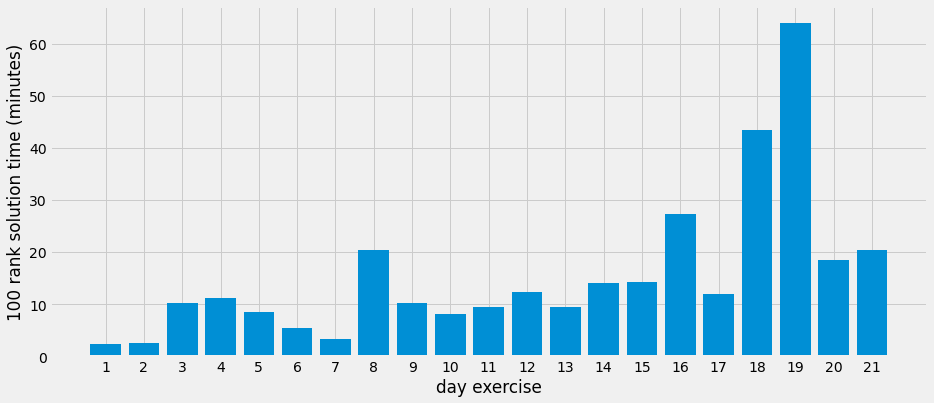

In [293]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(14,6))
plt.bar(1+np.arange(len(t)),t)
plt.xlabel('day exercise')
plt.ylabel('100 rank solution time (minutes)')
plt.xticks(1+np.arange(len(t)),1+np.arange(len(t)))

In [ ]:
[[[[6,6],[7,6]],[[7,7],[7,0]]],[[[7,7],[7,7]],[[7,8],[9,9]]]]

In [103]:
def add_tree_str(l1,l2):
    r='['+l1+','+l2+']'
    r=reduce(r)
def detect_nested(tree_str):
    inici_nested=None
    final_nested=None
    oberts=(np.array(list(tree_str))=='[').cumsum()
    tencats=(np.array(list(tree_str))==']').cumsum()
    profunditat=((oberts-tencats)-1)
    nested_4=np.where(profunditat==4)[0]
    if len (nested_4):
        inici_nested=min(nested_4)
        final_nested=min(np.where((profunditat[:-1]==4)&(profunditat[1:]!=4))[0])+1

    return inici_nested,final_nested
def explode_pair(tree_str,inici_pair,final_pair):
    values=eval(tree_str[inici_pair:final_pair+1])
    left_value=values[0]
    right_value=values[1]
    
def detect_left



In [104]:
tree='[[3,[2,[1,[5,3]]]],[6,[5,[4,[3,2]]]]]'
pos=detect_nested(tree)
if pos[0] is not None:
    print(tree[pos[0]:pos[1]+1])

[5,3]


In [98]:
pos


(10, 11)

In [37]:
np.where(((oberts-tencats)-1)==4)[0].min()

4

In [35]:
tree_str[4:8]

'[9,8'